            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


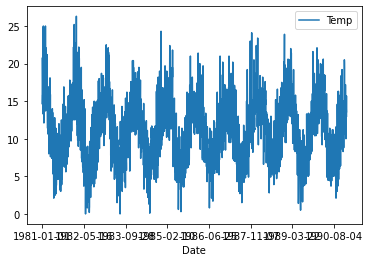

In [2]:

import pandas as pd
from matplotlib import pyplot
series = pd.read_csv('D:\\PG-DBDA\\PML\\australia_temp_data.csv', header=0, index_col=0)
print(series.head())
series.plot()
pyplot.show()

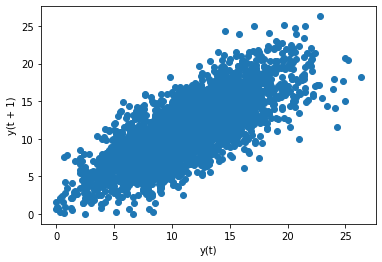

In [4]:
from pandas.plotting import lag_plot
lag_plot(series)
pyplot.show()

In [7]:
from pandas import DataFrame
from pandas import concat
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

         t-1      t+1
t-1  1.00000  0.77487
t+1  0.77487  1.00000


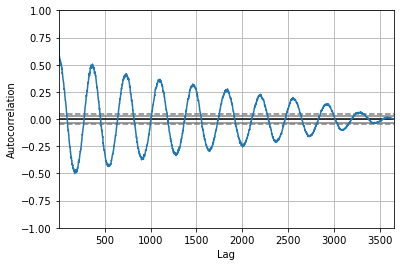

In [8]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

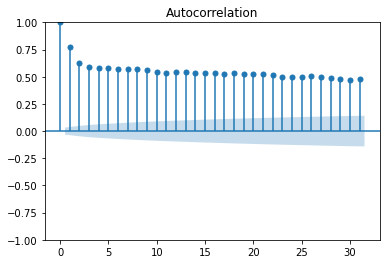

In [9]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(series, lags=31)
pyplot.show()

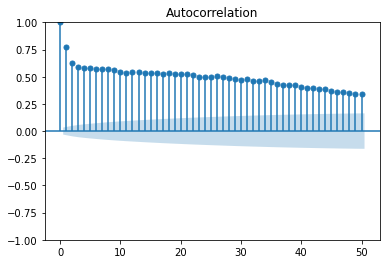

In [21]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series['Temp'], lags=50)
pyplot.show()

In [11]:
# create lagged dataset

dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']

In [13]:
X = series.values

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X,  train_size = 0.70, random_state = 42)

In [16]:
# train autoregression
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(X_train, lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

Coefficients: [ 1.21508287e+01 -1.36708360e-02  2.04283253e-02  1.76809577e-02
 -3.16832040e-02  3.08862503e-02  1.88381937e-03 -6.30340474e-04
 -1.82052364e-02  2.79269080e-02  8.01357171e-03  6.55007341e-03
  1.14722299e-02 -5.18526457e-03 -1.94136954e-02 -1.75194313e-02
 -4.18336882e-02 -3.39328045e-03 -2.23838211e-02  9.13075921e-03
 -2.31842932e-02  2.44329188e-02  2.03758535e-02 -1.59892070e-02
 -3.26639347e-02  1.95656246e-03 -2.33170777e-02  1.44377068e-02
 -2.88549765e-02  1.65568559e-02]


In [20]:
# make predictions
from sklearn.metrics import mean_squared_error
from math import sqrt
predictions = model_fit.predict(start=len(X_train), end=len(X_train)+len(X_test)-1, dynamic=False)
for i in range(len(predictions)):
 print('predicted=%f, expected=%f' % (predictions[i], X_test[i]))
rmse = sqrt(mean_squared_error(X_test, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=11.629821, expected=9.900000
predicted=11.136638, expected=6.300000
predicted=11.411635, expected=7.600000
predicted=10.470608, expected=16.200000
predicted=11.332048, expected=12.800000
predicted=10.971644, expected=17.600000
predicted=11.503187, expected=18.100000
predicted=10.778470, expected=7.900000
predicted=10.869414, expected=12.800000
predicted=11.645549, expected=15.700000
predicted=10.724089, expected=8.800000
predicted=11.021908, expected=7.500000
predicted=11.203868, expected=17.400000
predicted=11.425450, expected=18.800000
predicted=11.149850, expected=8.800000
predicted=11.123292, expected=9.900000
predicted=11.723333, expected=13.700000
predicted=11.251194, expected=10.700000
predicted=10.923879, expected=11.600000
predicted=11.283745, expected=15.300000
predicted=10.817809, expected=22.000000
predicted=11.410507, expected=16.800000
predicted=11.162744, expected=5.800000
predicted=11.258662, expected=12.600000
predicted=11.443138, expected=21.700000
predicted

predicted=11.186595, expected=15.400000
predicted=11.186595, expected=9.800000
predicted=11.186595, expected=12.700000
predicted=11.186595, expected=11.900000
predicted=11.186595, expected=10.000000
predicted=11.186595, expected=10.400000
predicted=11.186595, expected=14.500000
predicted=11.186595, expected=12.400000
predicted=11.186595, expected=9.700000
predicted=11.186595, expected=7.600000
predicted=11.186595, expected=16.900000
predicted=11.186595, expected=4.800000
predicted=11.186595, expected=15.500000
predicted=11.186595, expected=13.000000
predicted=11.186595, expected=1.800000
predicted=11.186595, expected=16.400000
predicted=11.186595, expected=12.700000
predicted=11.186595, expected=8.800000
predicted=11.186595, expected=17.400000
predicted=11.186595, expected=12.800000
predicted=11.186595, expected=5.600000
predicted=11.186595, expected=12.900000
predicted=11.186595, expected=6.200000
predicted=11.186595, expected=4.900000
predicted=11.186595, expected=13.200000
predicted

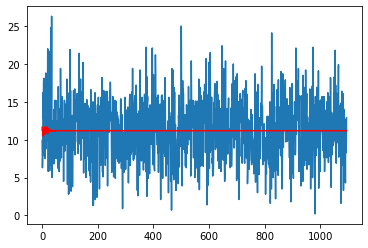

In [19]:
# plot results
pyplot.plot(
    X_test)
pyplot.plot(predictions, color='red')
pyplot.show()

pip install pmdarima

In [1]:
from pmdarima.arima.utils import ndiffs  